<a href="https://colab.research.google.com/github/AbdelrahmanTamer11/Facial-Expression-Recognition/blob/main/facial_expression_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [ ]:
# Paths to the dataset
train_dir = "/kaggle/input/fer2013/train"
test_dir = "/kaggle/input/fer2013/test"
img_size = 48


In [ ]:
# Data augmentation and normalization for training and validation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)


In [ ]:
# Data generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation"
)


Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [ ]:
# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(7, activation='softmax')  # 7 classes for emotions
])


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=100, validation_data=validation_generator)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,615 (1.36 MB)

 Trainable params: 356,231 (1.36 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 58s 151ms/step - accuracy: 0.2105 - loss: 2.2821 - val_accuracy: 0.2549 - val_loss: 1.8143
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 56s 153ms/step - accuracy: 0.2782 - loss: 1.8478 - val_accuracy: 0.3513 - val_loss: 1.6796
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 150ms/step - accuracy: 0.3093 - loss: 1.7657 - val_accuracy: 0.3708 - val_loss: 1.6588
Epoch 4/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 151ms/step - accuracy: 0.3265 - loss: 1.7329 - val_accuracy: 0.3513 - val_loss: 1.6612
Epoch 5/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 53s 147ms/step - accuracy: 0.3348 - loss: 1.6913 - val_accuracy: 0.3324 - val_loss: 1.6646
Epoch 6/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 54s 147ms/step - accuracy: 0.3594 - loss: 1.6489 - val_accuracy: 0.3792 - val_loss: 1.5809
Epoch 7/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 53s 146ms/step - accuracy: 0.3745 - loss: 1.6163 - val_accuracy: 0.3959 - val_loss: 1.5611
Epoch 8/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 83s 149ms/step - accuracy: 0.3892 -

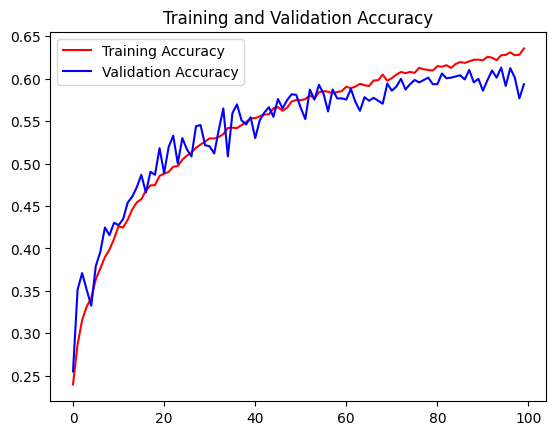

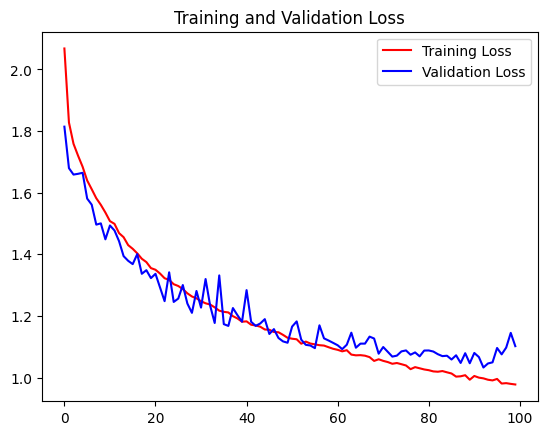

In [ ]:
# Plotting accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Saving the model
model.save('emotion_model.h5')

# Evaluating on test data
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Train accuracy: {train_acc*100:.2f}%, Validation accuracy: {test_acc*100:.2f}%")

359/359 ━━━━━━━━━━━━━━━━━━━━ 36s 99ms/step - accuracy: 0.6394 - loss: 0.9570
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.5936 - loss: 1.1471
Train accuracy: 63.66%, Validation accuracy: 59.36%


In [ ]:
# Loading and predicting on a single image
img_path = "/kaggle/input/fer2013/test/angry/PrivateTest_10131363.jpg"
img = image.load_img(img_path, target_size=(img_size, img_size), color_mode='grayscale')
img = np.array(img) / 255.0
img = np.expand_dims(img, axis=0)  # Reshape to (1, 48, 48, 1)

# Predicting the emotion
prediction = model.predict(img)
label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}
predicted_class = np.argmax(prediction)
print(f"Predicted emotion: {label_dict[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Predicted emotion: Angry
